<a href="https://colab.research.google.com/github/ajayantrix/CNN_MelanomaDetection/blob/main/AjayRatnu_CNN_MelanomaAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [14]:
#Importing necessary libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [15]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
#Image files are compressed, decompressing these
!unzip gdrive/MyDrive/Temp_Data/CNN_assignment.zip

Archive:  gdrive/MyDrive/Temp_Data/CNN_assignment.zip
replace Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic kerat

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [17]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [18]:
#let's look at total file counts
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [19]:
# Initialize some key parameters
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [20]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [21]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [22]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
#print(type(class_names))
print(len(class_names), "Classes in all")

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9 Classes in all


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

<class 'pathlib.PosixPath'>
(32, 180, 180, 3)
(32,)
tf.Tensor(2, shape=(), dtype=int32)
(180, 180, 3)


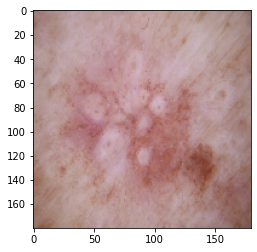

In [13]:
#Let's juts print a image as a check
print(type(data_dir_train))
for image, labels in train_ds.take(1):
  print(image.shape)
  print(labels.shape)
  print(labels[5])  
  print(image[5].shape)
  plt.imshow(image[5].numpy().astype("uint8"))


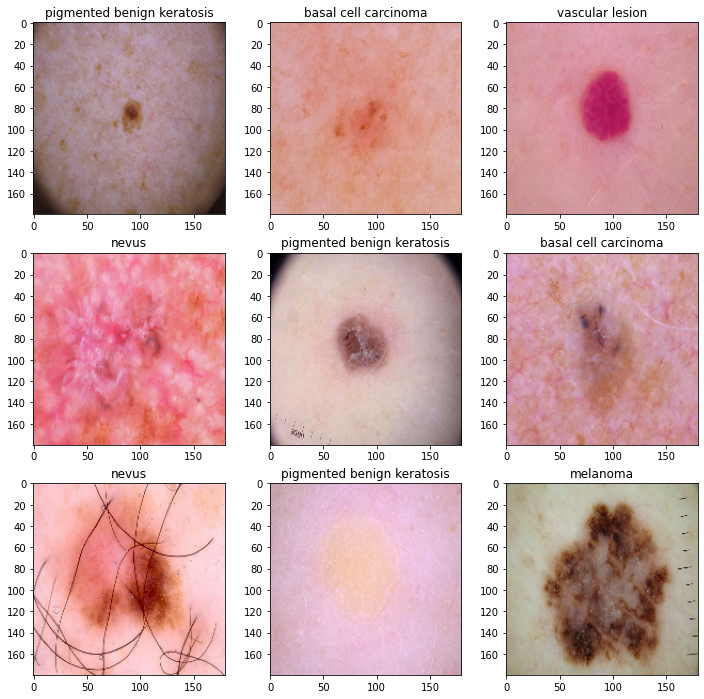

In [11]:
#Look at images across classes from the batch
import matplotlib.pyplot as plt
from glob import glob 

fig = plt.figure(figsize=(12,12))
for image, labels in train_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    
plt.show()

#Not one per class, so we will try again in a different way

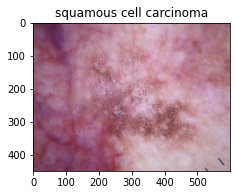

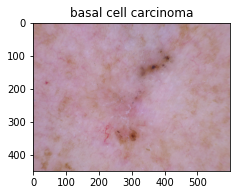

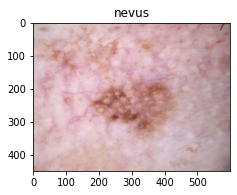

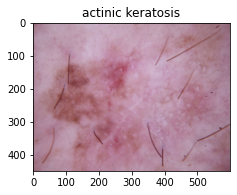

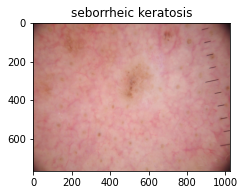

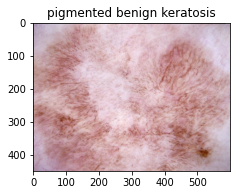

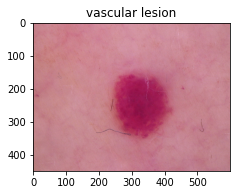

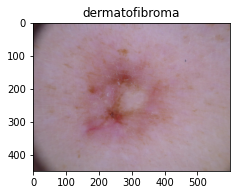

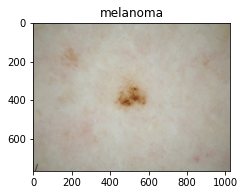

In [12]:
#Cycle thru file to print a sample image from each class
import matplotlib.image as mpimg

directory=os.listdir('Skin cancer ISIC The International Skin Imaging Collaboration/Train')
for each in directory:
    fig = plt.figure(figsize=(12,12))
    currentFolder = 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/' + each    
    for i, file in enumerate(os.listdir(currentFolder)[0:1]):
        fullpath = currentFolder+ "/" + file
        #print(fullpath)
        #img=mpimg.imread(fullpath)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(mpimg.imread(fullpath))
        plt.title(each)
    
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
#Seeting up AUTOTUNE with Cache & Prefetch
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
### Your code goes here

# Total no. of classes, i.e. the types of diseases
num_classes = len(class_names)

# Define the model layers, includinh the re-sizing to 180x180
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(16, kernel_size=(3, 3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(9))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [17]:
# Let's fit the first model on our image traing dataset
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 116ms/step - loss: 1.9760 - accuracy: 0.2573 - val_loss: 1.7695 - val_accuracy: 0.3870
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.5913 - accuracy: 0.4319 - val_loss: 1.4798 - val_accuracy: 0.5056
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4931 - accuracy: 0.4782 - val_loss: 1.4943 - val_accuracy: 0.5056
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3289 - accuracy: 0.5206 - val_loss: 1.3972 - val_accuracy: 0.5235
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2570 - accuracy: 0.5619 - val_loss: 1.5160 - val_accuracy: 0.4720
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.1140 - accuracy: 0.6083 - val_loss: 1.4157 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.0265 - accuracy: 0.6339 - val_loss: 1.4734 - val_accuracy: 0.5190
Epoch 8/20


### Visualizing training results

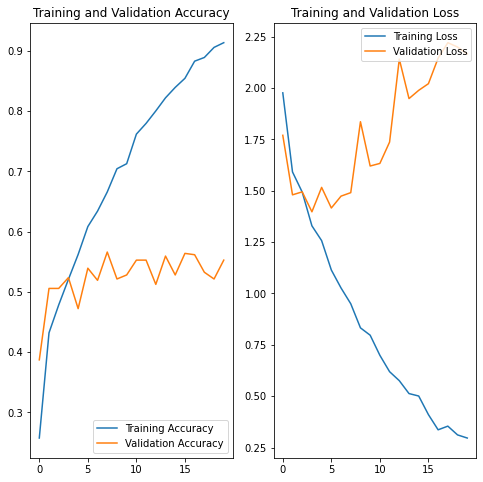

In [18]:
# Let's look at how the accuracy & loss numbers progress as we iterate through multiple epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

1. After around the 3rd epoch we see Train & Validation loss & accuracy diverge from each other
2. While the training accuracy goes on improving(~91% by the 20th epoch), the validation accuracy hovers around the 55% mark
3. This is clearly an Overfit model, while it learns the data very well those learnings are not the general trends and patterns rather pattrens very specific to the training data set
4. We need to change the model somehow to overcome this

In [73]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  layers.experimental.preprocessing.RandomFlip('horizontal'),
  layers.experimental.preprocessing.RandomZoom(0.1),
)



In [54]:
# Todo, visualize how your augmentation strategy works for one instance of training image.



### Todo:
### Create the model, compile and train the model


In [81]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

## We are adding the augmentation layer here as part of the 2nd model itself

model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
  layers.experimental.preprocessing.RandomFlip('horizontal'),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [82]:
## Your code goes here
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [83]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 43ms/step - loss: 2.0496 - accuracy: 0.2690 - val_loss: 1.7936 - val_accuracy: 0.3535
Epoch 2/20
56/56 [==============================] - 2s 39ms/step - loss: 1.7015 - accuracy: 0.3923 - val_loss: 1.6300 - val_accuracy: 0.4318
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4934 - accuracy: 0.4794 - val_loss: 1.4670 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4015 - accuracy: 0.5045 - val_loss: 1.5657 - val_accuracy: 0.4765
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3467 - accuracy: 0.5262 - val_loss: 1.3557 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 1.2502 - accuracy: 0.5497 - val_loss: 1.3178 - val_accuracy: 0.5503
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 1.2124 - accuracy: 0.5608 - val_loss: 1.3805 - val_accuracy: 0.5280
Epoch 8/20
56

### Visualizing the results

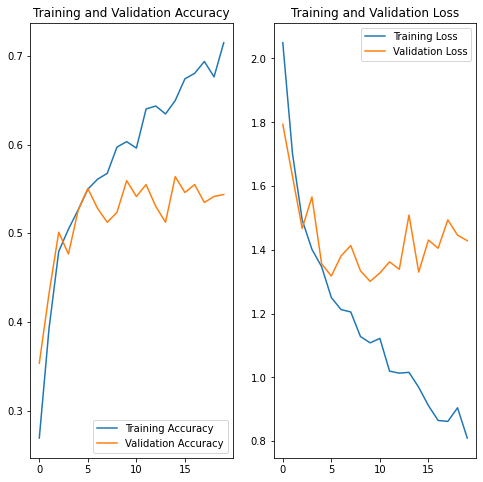

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

1. We see some improvement in terms of lesser divergence between Train and Validation accuracies
2. Especially after the addition of a dropout layer, which suggests the dropout layer is mainly resonsible in correcting the overfit
3. While the training accuracy goes on improving (to 71% by the 20th epoch), the validation accuracy hovers around the 54% mark
4. This is clearly an Overfit model and also the accuracy in training has also gone down
5. We need to change the model somehow to overcome this

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

2239
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


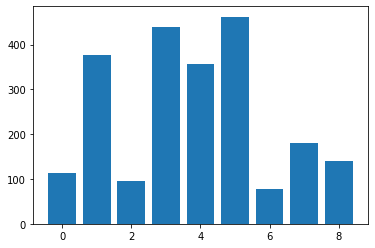

In [11]:
## Your code goes here.

from glob import glob
from sklearn.preprocessing import LabelEncoder
from collections import Counter

path_lst = [x for x in glob(os.path.join(data_dir_train,'*','*.jpg'))]
tot_files = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*','*.jpg'))]
print(len(tot_files))

# Put the file information in a dataframe to compute how many in each class

df_dictionary = dict(zip(path_lst, tot_files))
df_all_images = pd.DataFrame(list(df_dictionary.items()), columns=['Path', 'Label'])
df_all_images.head(10)

X, y = df_all_images['Path'], df_all_images['Label']
print(class_names)
y = LabelEncoder().fit_transform(y)
counter = Counter(y)

for i, j in counter.items():
  proprotion = j/len(y)*100

plt.bar(counter.keys(), counter.values())
plt.show()


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
##### - least number of samples: `seborrheic keratosis`
##### - `actinic keratosis` & `dermatofibroma` also have very few samples
#### - Which classes dominate the data in terms proportionate number of samples?
##### - Most samples: `pigmented benign keratosis`, followed by `melanoma` with >400 samples each


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [13]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [14]:
print(data_dir_train)
print(class_names)

Skin cancer ISIC The International Skin Imaging Collaboration/Train
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [15]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F57300F68E0>: 100%|██████████| 500/500 [00:21<00:00, 23.63 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F57300B3F40>: 100%|██████████| 500/500 [00:19<00:00, 25.91 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F57300AF2E0>: 100%|██████████| 500/500 [00:16<00:00, 31.00 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F573006F8E0>: 100%|██████████| 500/500 [01:31<00:00,  5.48 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F5731A24490>: 100%|██████████| 500/500 [01:30<00:00,  5.51 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5731A33190>: 100%|██████████| 500/500 [00:18<00:00, 27.15 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F573006F0A0>: 100%|██████████| 500/500 [00:38<00:00, 12.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F573011F340>: 100%|██████████| 500/500 [00:15<00:00, 31.81 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F573018D4C0>: 100%|██████████| 500/500 [00:16<00:00, 31.08 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [16]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [17]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0031140.jpg_504101ed-97c0-4be8-a43f-3fde5b1e7039.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025046.jpg_22be0236-f281-4408-9fa8-c7294a85bc35.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028653.jpg_2e7f7729-851e-4731-98fc-003fb3642d9a.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026766.jpg_55a6e337-f324-4f01-90d3-39a45c4fe2a9.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0030594.jpg_1fcbaf0c-15a2-40c5-a034-fe64e327db20.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaborat

In [18]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [19]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [20]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df_all_images.append(df2)

In [21]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [22]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [23]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [24]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [25]:
## your code goes here
num_classes = len(class_names)

model3 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [26]:
## your code goes here
## Compile the model\
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



#### **Todo:**  Train your model

In [27]:
# Fit the model
epochs = 30
## Your code goes here, use 50 epochs.
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 32s 136ms/step - loss: 1.7058 - accuracy: 0.3459 - val_loss: 1.4011 - val_accuracy: 0.5011
Epoch 2/30
169/169 [==============================] - 25s 141ms/step - loss: 1.3218 - accuracy: 0.5095 - val_loss: 1.2145 - val_accuracy: 0.5486
Epoch 3/30
169/169 [==============================] - 23s 133ms/step - loss: 1.1216 - accuracy: 0.5829 - val_loss: 1.0703 - val_accuracy: 0.6095
Epoch 4/30
169/169 [==============================] - 23s 135ms/step - loss: 0.9252 - accuracy: 0.6649 - val_loss: 0.9595 - val_accuracy: 0.6511
Epoch 5/30
169/169 [==============================] - 23s 133ms/step - loss: 0.7833 - accuracy: 0.7211 - val_loss: 0.9602 - val_accuracy: 0.6503
Epoch 6/30
169/169 [==============================] - 24s 136ms/step - loss: 0.6705 - accuracy: 0.7648 - val_loss: 0.8038 - val_accuracy: 0.7149
Epoch 7/30
169/169 [==============================] - 23s 134ms/step - loss: 0.5723 - accuracy: 0.7927 - val_loss: 0.7665 - val_ac

#### **Todo:**  Visualize the model results

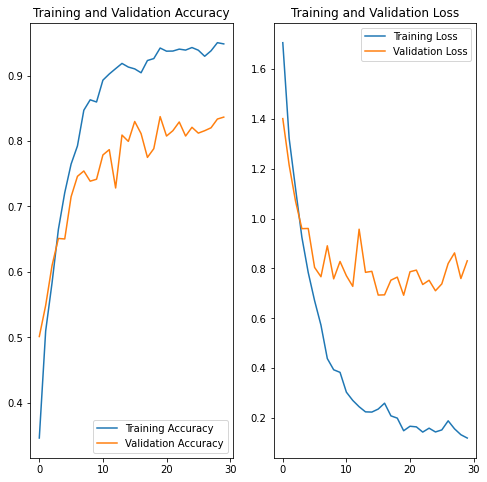

In [28]:
# Plot the history of model accuracy & oss across the epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

### - The disparity between Training and validation has been reduced a lot, we can say that overfitting has been contained and managed in this approach but not fixed completely
### - So there is still scope for improvement to fix some remaining overfitting
### - We see Training accuracy steadily go up to ~95% and Validation accuracy go up to ~84%, clearly better than our last 2 models
### - So Augmentation/fixing Class imbalance certainly helped the validation accuracy jump from 50-55% to now ~84%
### - Even the Training accuracy has increased substantially compared to the model with just Keras pre-processing augmentation layers
## - We could say the Augemntation helped model learn more of the general features i.e. to identify what characteristics make a skin condition 'Melanoma' and what is different in say 'Nevus' generalized across the 9 conditons in our data, 
### -This also shows that in general more data helps models learn better
### We may try keras.preprocessing.image (ImageDataGenerator) to generate additional images for the sparse classes to see if that improves the result

